### Step 2: Using the same Shakespeare play from your Week 6 Assignment:

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# response = requests.get('https://www.gutenberg.org/cache/epub/1513/pg1513.txt')
response = requests.get('https://www.gutenberg.org/files/1513/1513-h/1513-h.htm')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
document = document.text
for i in ['\n','[',']','’','”','“', '\r']:
    document = document.replace(i,' ')

Tokenize the words, remove stopwords, stem or lemmatize the words, and calculate the word frequencies

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.probability import FreqDist

In [4]:
sentences = sent_tokenize(document)
words = word_tokenize(document.lower())
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStopWords = [w for w in words if w not in myStopWords]
freq = FreqDist(wordsNoStopWords)

For the word frequencies, calculate the mean, median, mode, and trimmed mean

In [5]:
import pandas as pd

In [21]:
word = []
freq_count = []

for i in sorted(freq, key=freq.get, reverse=True):
    word.append(i)
    freq_count.append(freq[i])
    
word_frequency = pd.DataFrame({'word': word,
              'frequency': freq_count},
             columns = ['word', 'frequency'])

print('mean = ', word_frequency['frequency'].mean())
print('median = ', word_frequency['frequency'].median())
print('mode = ', word_frequency['frequency'].mode())

mean =  4.043673571250312
median =  1.0
mode =  0    1
dtype: int64


To get the trimmed mean, looked at where the frequency started showing 5, as words occuring 1, 2, 3, or 4 times aren't the most frequent and aren't as interesting and relevant I thought.

In [40]:
print('trimmed mean =', word_frequency[word_frequency['frequency'] > 5].mean())

trimmed mean = frequency    19.81015
dtype: float64


/tmp/ipykernel_55/2287826065.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('trimmed mean =', word_frequency[word_frequency['frequency'] > 5].mean())


Plot a histogram of the word frequency data and comment on the relative locations of the mean, median, mode, and trimmed mean

<AxesSubplot:ylabel='Frequency'>

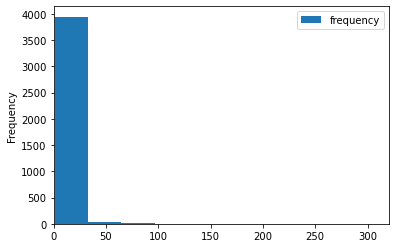

In [51]:
word_frequency.plot(kind='hist', xlim=(0,320))

Skewed in the first 0-40 bins, but heavily by the first bit. So mean of 4, a median of 1, and a mode of 1 makes sense. For the trimmed mean, 19 feels more appropriate.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

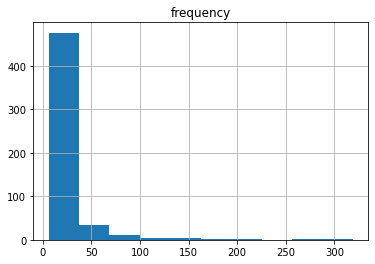

In [48]:
word_frequency[word_frequency['frequency'] > 5].hist()

In [56]:
print('interquartile range =', word_frequency['frequency'].quantile(0.75) - word_frequency['frequency'].quantile(0.25))
print('std =', word_frequency['frequency'].std())

interquartile range = 2.0
std = 12.033272199261077


Comment as well on how they compare to each other and to the histogram plot.

Interquartile range is understandable since a large majority lies in the first couple bins, and the standard deviation makes sense as it is low and most of the values are closer together. However, the interquartile range and standard deviation differ in value a good amount.

### Step 3: Foray into machine learning



In [57]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

Use the following code to view a description of the dataset:

In [59]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Do some exploratory data analysis of the features, including getting summary statistical information

In [63]:
features_df.describe().round(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561


Find the column in features_df that has the highest correlation coefficient with the target values in target_df

In [69]:
import numpy as np

In [77]:
columns = list(features_df.columns)
correlations = []
for column in columns:
    corr = np.corrcoef(features_df[column],target_df)
    correlations.append(corr[0,1])

print(correlations)
print('max correlation coefficient =', columns[correlations.index(max(correlations))])

[0.18788875071891983, 0.0430619984516054, 0.5864501344746891, 0.4414838489308862, 0.2120224810145508, 0.17405358696874249, -0.39478925067091847, 0.4304528847447734, 0.5658834252428094, 0.3824834842485812]
max correlation coefficient = bmi


Make a scatter plot of the target values vs this feature column's values and comment on how the plotted points match up with the correlation coefficient

<AxesSubplot:xlabel='features', ylabel='target'>

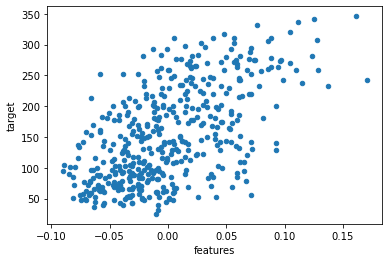

In [80]:
features_target = pd.DataFrame({'features': features_df['bmi'],
             'target': target_df},
             columns = ['features', 'target'])

features_target.plot(kind='scatter', x='features', y='target')


Not fully correlated, but there is some trend of correlation as there aren't many outliers and can be fitted well with regression.

Using this feature and target, perform linear regression with sklearn's LinearRegression

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
x=features_df[['bmi']]
y=target_df
reg = LinearRegression().fit(x, target_df)

Print the coefficients of the model

In [111]:
reg.coef_

array([949.43526038])

Plot the linear fit on top of the scatter plot

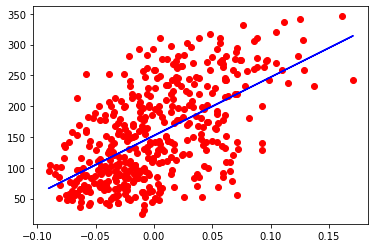

In [114]:
reg.intercept_
ytrain = reg.intercept_ + reg.coef_ * x
plt.plot(x,y,'ro',x,ytrain,'b-');

Calculate (or output) the mean squared error and R-squared values for your fit

In [115]:
print('mean squared error =', mean_squared_error(y, ytrain))
print('r-squared value =', r2_score(y, ytrain))

mean squared error = 3890.4565854612724
r-squared value = 0.3439237602253803


Try doing linear regression with another variable and check how the new fit's mean squared error and R-squared values change.

min correlation coefficient = s3
mean squared error = 5005.661620710653
r-squared value = 0.1558585524453051


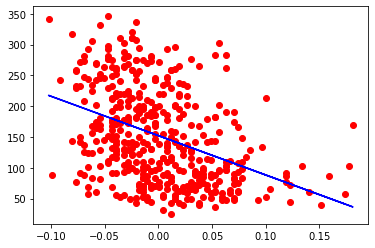

In [118]:
print('min correlation coefficient =', columns[correlations.index(min(correlations))])
x=features_df[['s3']]
y=target_df
reg = LinearRegression().fit(x, target_df)
ytrain = reg.intercept_ + reg.coef_ * x
plt.plot(x,y,'ro',x,ytrain,'b-');
print('mean squared error =', mean_squared_error(y, ytrain))
print('r-squared value =', r2_score(y, ytrain))

Mean squared error is higher and the r-squared value is less than half of the initial linear regression. Compared to the most positive correlation, the most negative correlation is not as strong, but there is still a relationship / trend.